# Detectando Fraudes Bancárias

## Introdução<br>
Na Europa, apenas em 2013, foram realizadas um total de 42 bilhões de transações bancárias, sendo que 44% foram realizadas com cartões de crédito, segundoo relatório do [ECB - Europe Central Bank, 2013](https://www.ecb.europa.eu/press/pdf/pis/pis2013.pdf). Este total de transações movimentou uma quantia de € 31,7 trilhões em dinheiro, sendo que € 1,55 bilhão foram perdidos com fraudes bancárias feitas através de cartão de crédito - [FICO - 2013](http://www.fico.com/en/blogs/fraud-security/european-card-fraud-map-shows-record-high-losses-in-2013/).

No mesmo período, no Brasil, foram realizados 40,3 bilhões de transações bancárias, sendo que 45% feitas através de internet banking e mobile banking, segundo relatório da [Febraran/2013](https://cmsportal.febraban.org.br/Arquivos/documentos/PDF/Pesquisa%20FEBRABAN%20de%20Tecnologia%20Banc%C3%A1ria%202017.pdf). Um total de 7 bilhões de reais foi investido em tecnologia para transações bancárias e, mesmo assim, 1,5 bilhão de reais foram perdidos com fraudes bancárias feitas com cartão de crédito - [TechinBrazil/2013](, https://techinbrazil.com.br/fraudes-com-cartoes-de-credito-no-brasil).

Apesar do dinheiro movimentado e, do total investidos em tecnologia, perdeu-se muito em fraudes bancárias. Este prejuízo pode ser mitigado, como já é feito em transações bancárias de determinados bancos, com o uso das tecnologias em Machine Learning e Pattern Recognition, sendo possível classificar, identificar e, bloquear as fraudes bancárias que estão acontecendo.<br>

## Qual é o objetivo desse estudo?<br>
Dado a importacia da identificação da autenticidade de uma transação bancária para várias instituições financeiras, propomos aqui investigar o problema de “Identificação de de fraudes bancárias com Machine Learning”.<br>
    
Como não encontramos nenhuma base nacional (brasileira), utilizamos a base de dados ["*Credit Card Fraud Detection. Anonymized credit card transactions labeled as fraudulent or genuine*"](https://www.kaggle.com/dalpozz/creditcardfraud/data) disponível no Kaglle.<br>

**Clicando no botão a baixo, é possível visualizar ou omitir o código **

In [24]:
#  Run (once) to allow nice html output as report (optional) 

"""
Hide code cells in an IPython notebook or exported HTML using javascript. 
"""

import IPython.core.display as di

# This line will hide code by default when the notebook is exported as HTML
di.display_html(
    '<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area, .output_stderr").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

CSS = """.input_area .output_stderr {height: 2.0em; overflow: hidden}"""  # changes input_subarea width to 1 visible line
HTML('<style>{}</style>'.format(CSS))

# This line will add a button to toggle visibility of code blocks, for use with the HTML export version.
di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Mostrar/Esconder o código</button>''', raw=True)

Mostrar/Esconder o código

## Índice:<br>
1.  **Informações sobre a Base de Dados**
*   **Analise dos Dados**
    1. **Visualizando as primeiras linhas**
    2. **Checando a quantidade de registros**<br>

*   **Preparação dos Dados**
*   **Treinamento da Rede Neural**
    1. **Visualize MSE. & Loss**
    1. **Reconstruction error without fraud**
    1. **Reconstruction error with fraud**
    1. **Matriz de Confusão**
*   **Conclusão**

## 1. Informações sobre a Base de Dados:

Base de dados[Credit Card Fraud Detection](https://www.kaggle.com/dalpozz/creditcardfraud/data) do Kaglle.
Em Setembro de 2013, foi realizado um monitoramento de 284.807 transaçãoes bancárias, identificando 492 fraudes bancárias.<br>
A base está altamente desbalanceada - Fraudes representama 0,172748563 % do total de transaçoes identificadas. Ela contém apenas variáveis numéricas, resultantes de uma transformação PCA, sendo distribuídas da seguinte forma:

* Conjunto de V1...V28 - Componentes principais, resultantes de uma transformação PCA<br>
* Amount - *Montante da transação*<br>
* Time - *Tempo da transação*<br>
* Class - *Classificação da transação: 0 se Normal ou 1 se Fraude<br>


**Os responsáveis por gerar a base de dados foram:**<br>

Andrea Dal Pozzolo, Olivier Caelen, Reid A. Johnson e Gianluca Bontempi. Calibrating Probability with Undersampling for Unbalanced Classification. In Symposium on Computational Intelligence and Data Mining (CIDM), IEEE, 2015

In [19]:
%matplotlib inline
import pandas as pd # Para criarmos DataFrames
import numpy as np # Realizar alguns calculos matemáticos
import matplotlib.pyplot as plt # Para criação de gráficos
import seaborn as sns # Design de gráficos mais atraentes
from ggplot import *

## 2. Analise dos Dados:

In [3]:
creditcard = pd.read_csv('creditcard.csv', encoding='ISO-8859-1')

In [5]:
creditcard.shape

(284807, 31)

### 2.1 Visualizando as primeiras linhas

In [8]:
creditcard.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### 2.2 Checando a quantidade de registros

In [18]:
creditcard.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Verificamos que, no total, temos 284.807 linhas com 31 colunas cada.<br>
Agora precisamos verificar se alguma deslas são nulas e quantas ao total.<br>
Para isso vamos realizar uma contagem para cada variável.<br>

In [10]:
creditcard.isnull().values.any()

False

Podemos verrificar que nenhum dado está vazio então, vamos ver a comparação de tempo de transações fraudulentas e autênticas.<br>No gráfico abaixo podemover ver a porcetangem de transações bancárias que são uma fraude em relação ao total de dados.

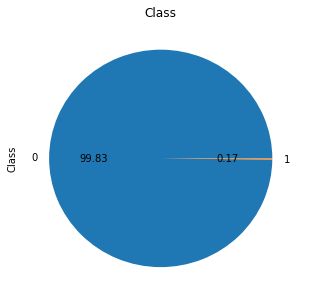

In [11]:
pie_plot = pd.Series(creditcard['Class'].groupby(creditcard['Class']).count())

pie_plot.plot(kind='pie', figsize=(5,5), autopct='%.2f', title='Class')

In [33]:
print('Transacoes Autenticas:\n', creditcard[creditcard.Class == 0].shape)
print('Transacoes Fraudulentas:\n', creditcard[creditcard.Class == 1].shape)

normal_trans = creditcard.Time[creditcard.Class == 0]
fraud_trans = creditcard.Time[creditcard.Class == 1]

print('\nTransacoes Autenticas:\n', normal_trans.describe())
print('\nTransacoes Fraudulentas:\n', fraud_trans.describe())

Transacoes Autenticas:
 (284315, 31)
Transacoes Fraudulentas:
 (492, 31)

Transacoes Autenticas:
 count    284315.000000
mean      94838.202258
std       47484.015786
min           0.000000
25%       54230.000000
50%       84711.000000
75%      139333.000000
max      172792.000000
Name: Time, dtype: float64

Transacoes Fraudulentas:
 count       492.000000
mean      80746.806911
std       47835.365138
min         406.000000
25%       41241.500000
50%       75568.500000
75%      128483.000000
max      170348.000000
Name: Time, dtype: float64


Neste gráfico conseguimos visualizar a quantida de valores gastos em Fraudes.

Text(0.5,0,'Valor')

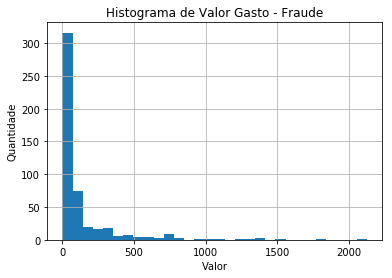

In [32]:
creditcard.Amount[creditcard.Class == 1].hist(bins = 30)
plt.title('Histograma de Valor Gasto - Fraude')
plt.ylabel('Quantidade')
plt.xlabel('Valor')

E neste gráfico, conseguimos visualizar a quantida de valores gastos em transação autênticas.

Text(0.5,0,'Valor')

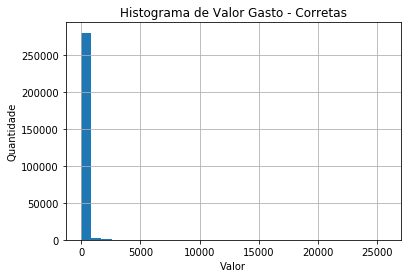

In [31]:
creditcard.Amount[creditcard.Class == 0].hist(bins = 30)
plt.title('Histograma de Valor Gasto - Corretas')
plt.ylabel('Quantidade')
plt.xlabel('Valor')
#plt.yscale('log')

Comparando a distribuição das transações autênticas com as Fraudes durante o tempo, verificamos que as Fraudes estão dispostas de maneira uniforme, o seja, o tempo não é um fator influenciador delas.<br> Já as transações autênticas possum um período igualmente distribuido durante os dois dias de monitoramento.

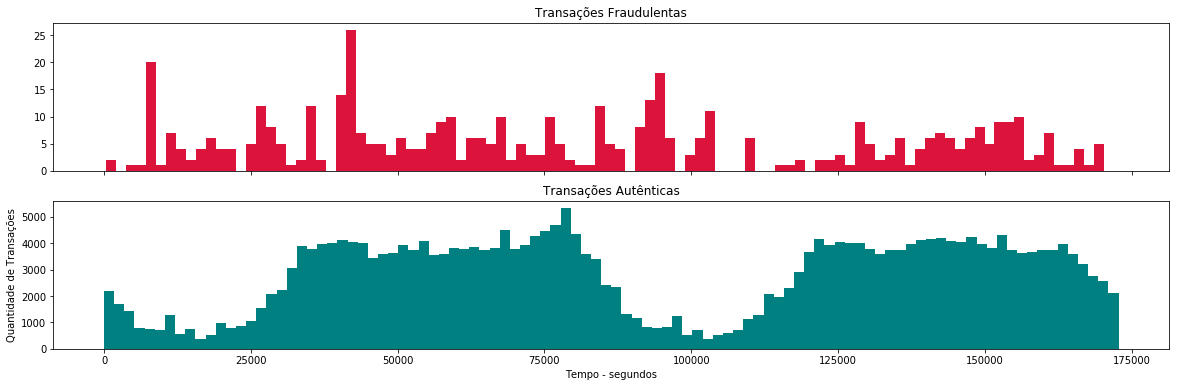

In [35]:
w, (fst, scd) = plt.subplots(2, 1, sharex=True, figsize=(20,6))

fst.set_title('Transações Fraudulentas')
cd_time_1 = creditcard.Time[creditcard.Class == 1]
fst.hist(cd_time_1, bins = 100, color='crimson')

scd.set_title('Transações Autênticas')
cd_time_0 = creditcard.Time[creditcard.Class == 0]
scd.hist(cd_time_0, bins = 100, color='teal')

plt.xlabel('Tempo - segundos')
plt.ylabel('Quantidade de Transações')
plt.show()

Podemos perceber analisando os graficos acima que o tempo não é algo que tem influência. Podemos até dizer que as transações fraudulentas estão distribuídas quase que uniformemente.

## 3. Preparação dos Dados:


Fazendo a análise dos dados anteriormente, percebemos que a coluna **Amount** posssue muitos *outliers*.<br>
Uma maneira muito comum e eficiente de minimizar o efeito deles na base de dados como um todo, é realizar um scale dos valores, por exemplo transformar todos os valores para um intervalo entre *-1* e *1*.
<br>
Para realizar este procedimento, utilizamos o módulo [sklearn.preprocessing.StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

In [36]:
from sklearn.preprocessing import StandardScaler

data = creditcard.drop(['Time'], axis=1)
data['Amount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))

In [37]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


## 4. Treinamento da Rede Neural:

Legal, agora que estamos com os dados prontos, iremos começar a treinar nossos modelos de Deep Learning :)

In [40]:
import keras
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from keras.utils import np_utils 
from keras.models import Sequential 
from keras.layers import Dense
from keras.layers import Activation
from keras.layers import Flatten
from keras.layers import ActivityRegularization
from keras.models import Sequential
from keras.layers import Dropout
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import LearningRateScheduler
from keras.optimizers import Adam
from keras.optimizers import SGD
from keras import optimizers
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import minmax_scale, quantile_transform
from numpy.random import seed
from tensorflow import set_random_seed

Using TensorFlow backend.
/home/guilherme/Applications/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [48]:
# convert the pd dataframe to a numpy vector
X = data.drop('Class', axis = 1).values.astype(float)

# Store target column in y array
y = data.Class

# normalize values
X_norm = X # minmax_scale(X, axis = 1)
y_norm = y

# split dataset
X_train, X_test, y_train, y_test = train_test_split(X_norm, y_norm, test_size=0.33, random_state=42)

# Model metaparameters
nb_epoch = 60
n_samples = X_train.shape[0]
n_samples_test = y_train.shape[0]

rlrop = ReduceLROnPlateau(monitor='val_loss'
                          , factor=0.1
                          , patience=1000
                          , verbose=0
                          , mode='auto'
                          , epsilon=0.0001
                          , cooldown=4
                          , min_lr=10e-7)

early_stopping = EarlyStopping(monitor='val_loss'
                               , min_delta=0.001
                               , patience=1500)

sgd = optimizers.SGD(lr=0.001
                     , decay=1e-6
                     , momentum=0.9
                     , nesterov=True)

%pylab inline
pylab.rcParams['figure.figsize'] = (14, 9)

Populating the interactive namespace from numpy and matplotlib


Usamos *Deep Learning* com *Tensor Flow* e *Keras*, com as seguintes características:
* 3 camadas internas
    * cada uma com 256, 128, 32 neurônios, respectivamente
* 1 camada de saída
* 60 épocas
* Ativação Relu
* Métricas MSE
* Separação dos dados:
    * 33% dos dados como conjunto de treino
    * 77% dos dados como conjunto de teste


In [42]:
model = Sequential() 
model.add(Dense(256, input_shape=(X_train.shape[1],), kernel_initializer='uniform', activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128, kernel_initializer='uniform', activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, kernel_initializer='uniform', activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, kernel_initializer='uniform', activation='relu'))
model.compile(loss='mean_squared_error', optimizer=sgd, metrics=['mse'])

hist_model = model.fit(X_train[:n_samples]
                                 , y_train[:n_samples]
                                 , epochs=nb_epoch
                                 , batch_size=50 
                                 , validation_data=(X_test[:n_samples_test], y_test[:n_samples_test])
                                 , verbose=1
                                 , callbacks=[early_stopping, rlrop])

Train on 190820 samples, validate on 93987 samples
Epoch 1/60
190820/190820 [==============================] - 20s 105us/step - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 0.0016 - val_mean_squared_error: 0.0016
Epoch 2/60
190820/190820 [==============================] - 20s 104us/step - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 0.0015 - val_mean_squared_error: 0.0015
Epoch 3/60
190820/190820 [==============================] - 17s 87us/step - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0015 - val_mean_squared_error: 0.0015
Epoch 4/60
190820/190820 [==============================] - 18s 93us/step - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0014 - val_mean_squared_error: 0.0014
Epoch 5/60
190820/190820 [==============================] - 16s 86us/step - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0013 - val_mean_squared_error: 0.0013
Epoch 6/60
190820/190820 [==============================] - 16s 86us/step - loss: 0.0015 - mean_s

190820/190820 [==============================] - 15s 79us/step - loss: 8.6329e-04 - mean_squared_error: 8.6329e-04 - val_loss: 6.5070e-04 - val_mean_squared_error: 6.5070e-04
Epoch 46/60
190820/190820 [==============================] - 18s 96us/step - loss: 8.5907e-04 - mean_squared_error: 8.5907e-04 - val_loss: 6.5144e-04 - val_mean_squared_error: 6.5144e-04
Epoch 47/60
190820/190820 [==============================] - 17s 89us/step - loss: 8.9139e-04 - mean_squared_error: 8.9139e-04 - val_loss: 6.5347e-04 - val_mean_squared_error: 6.5347e-04
Epoch 48/60
190820/190820 [==============================] - 16s 84us/step - loss: 8.6276e-04 - mean_squared_error: 8.6276e-04 - val_loss: 6.4873e-04 - val_mean_squared_error: 6.4873e-04
Epoch 49/60
190820/190820 [==============================] - 17s 89us/step - loss: 9.0404e-04 - mean_squared_error: 9.0404e-04 - val_loss: 6.4936e-04 - val_mean_squared_error: 6.4936e-04
Epoch 50/60
190820/190820 [==============================] - 17s 88us/step - 

### 4.1 Visualize MSE. & Loss

Conseguimos ver no gráfico de épocas a seguir que a taxa de perda da nossa rede durante o aprendizado foi diminuindo, o que é um resultado muito positivo, indicando que a nossa rede aprendeu mais a cada iteração.

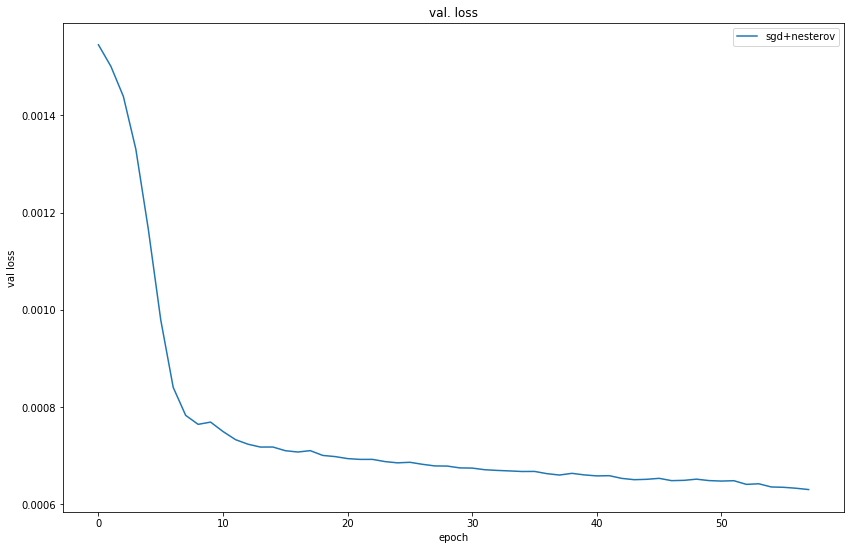

In [44]:
plt.plot(hist_model.history['val_loss'][1:-1])  
plt.title('val. loss')  
plt.ylabel('val loss')  
plt.xlabel('epoch')  
plt.legend(['sgd+nesterov'], loc='upper right')  

plt.show()

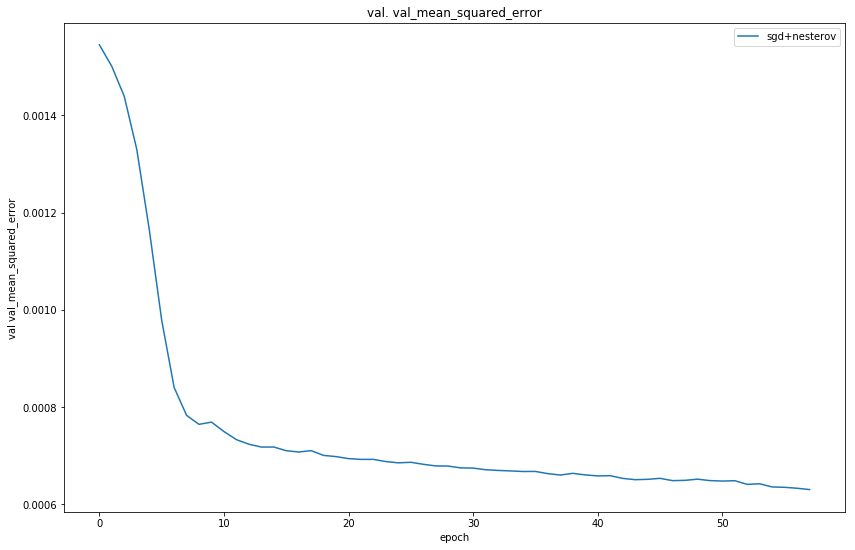

In [45]:
plt.plot(hist_model.history['val_mean_squared_error'][1:-1])  
plt.title('val. val_mean_squared_error')  
plt.ylabel('val val_mean_squared_error')  
plt.xlabel('epoch')  
plt.legend(['sgd+nesterov'], loc='upper right')  

plt.show()

**Neste gráfico temos um comparativo da parda de aprendizado entre os conjuntos de treino (acima) e teste (abaixo):**

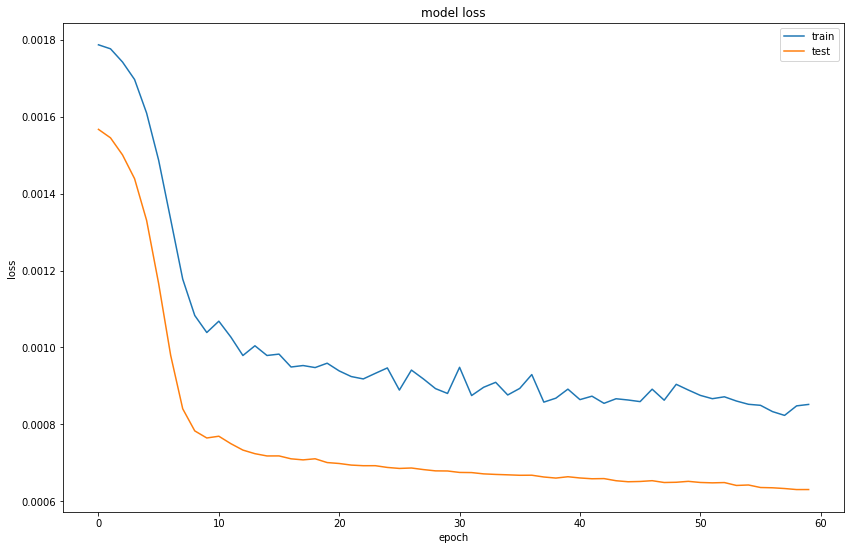

In [46]:
plt.plot(hist_model.history['loss'])
plt.plot(hist_model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');

In [49]:
predictions = model.predict(X_test)
mse = np.mean(np.power(X_test - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})
error_df.describe()

,reconstruction_error,true_class
count,93987.000000,93987.000000
mean,1.083249,0.001585
std,3.870818,0.039785
min,0.148072,0.000000
25%,0.422432,0.000000
50%,0.632169,0.000000
75%,0.970804,0.000000
max,276.242485,1.000000


### 4.2 Reconstruction error without fraud

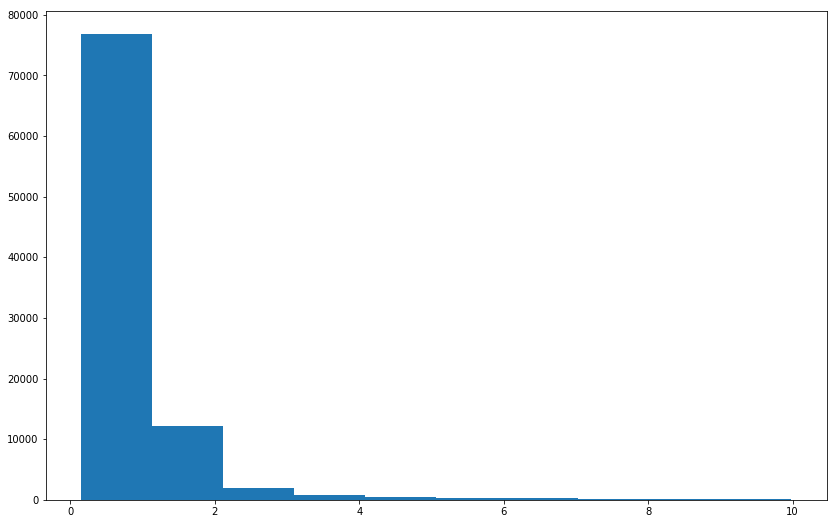

In [92]:
fig = plt.figure()
ax = fig.add_subplot(111)
normal_error_df = error_df[(error_df['true_class']== 0) & (error_df['reconstruction_error'] < 10)]
_ = ax.hist(normal_error_df.reconstruction_error.values, bins=10)

### 4.3 Reconstruction error with fraud

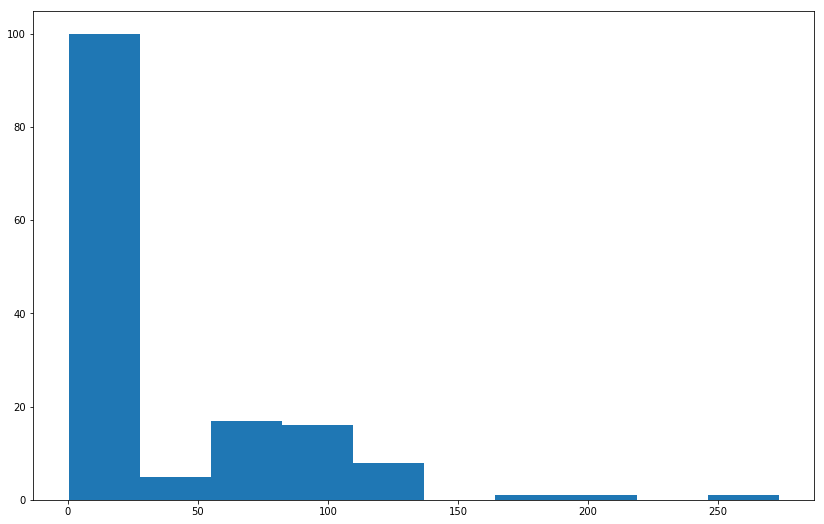

In [93]:
fig = plt.figure()
ax = fig.add_subplot(111)
fraud_error_df = error_df[error_df['true_class'] == 1]
_ = ax.hist(fraud_error_df.reconstruction_error.values, bins=10)

In [50]:
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
                             roc_curve, recall_score, classification_report, f1_score,
                             precision_recall_fscore_support)

Para analisar a performance do nosso classificador, utilizamos a curva ROC abaixo:

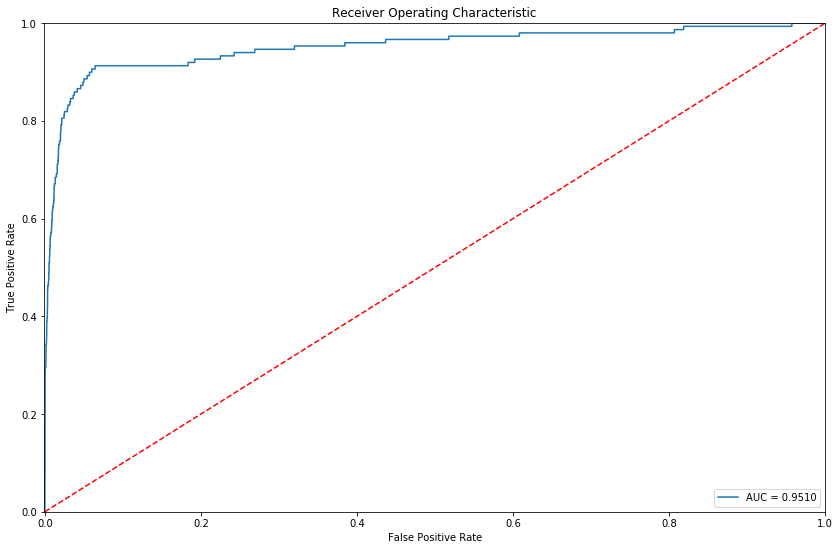

In [51]:
fpr, tpr, thresholds = roc_curve(error_df.true_class, error_df.reconstruction_error)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label='AUC = %0.4f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

Queremos que a linha azul esteja o mais próxima possível do número 1 no canto esquerdo superior, como visto acima para o nosso modelo.<br>O resultado visto está bom demais, porém precisamos lembrar que nosso dataset está altamente desbalanceado, como pode ser verificado no gráfico a seguir do *Recall vs Precision*.


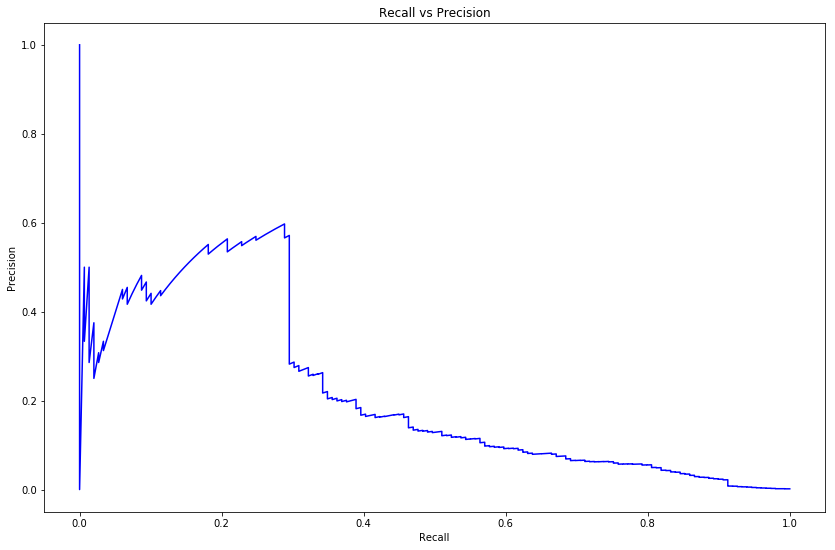

In [53]:
precision, recall, th = precision_recall_curve(error_df.true_class, error_df.reconstruction_error)
plt.plot(recall, precision, 'b', label='Precision-Recall curve')
plt.title('Recall vs Precision')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

Analisando a precisão para diferentes *thresholds* podemos verificar que** o nosso modelo alcançou uma precisão de aproximadamente 63,8%**.

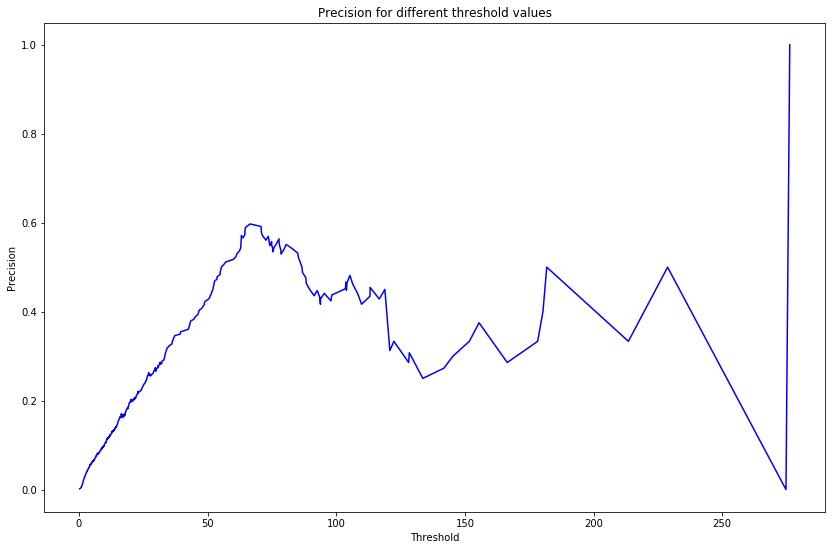

In [54]:
plt.plot(th, precision[1:], 'b', label='Threshold-Precision curve')
plt.title('Precision for different threshold values')
plt.xlabel('Threshold')
plt.ylabel('Precision')
plt.show()

### 4.4 Matriz de Confusão

Outra métrica que foi utilizada para validação do nosso modelo é a matriz de confusão, onde conseguimos verificar as métricas de *Precision* e *Recall*:

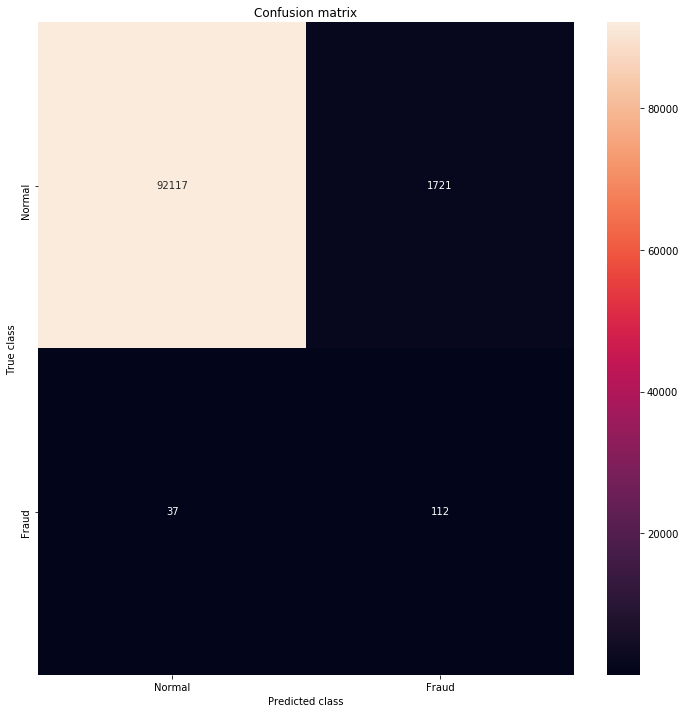

In [56]:
threshold = 5
LABELS = ["Normal", "Fraud"]

y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

## 5. Conclusão:

Analisando a curva de época verificamos que o nosso modelo evoluiu durante o aprendizado, conseguindo classificar de forma correta cada vez mais transações.<br>
Inevitavelmente surge a seuguinte pergunta:<br><br>
***É viável investir muito tempo para ter um ganho muito pequeno na acurácia do modelo?***<br>
Para o nosso modelo não, porque o custo com tempo é muito grande para se ter um aumento muito pequeno na classificação dos resultados.

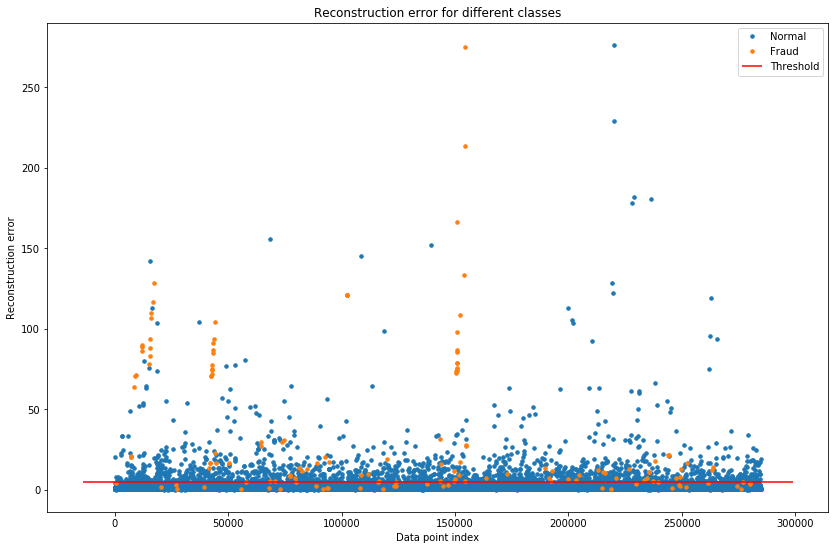

In [58]:
groups = error_df.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Fraud" if name == 1 else "Normal")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();